# Here where visualising goes without modifying or taking action

**job_id**: the ID number provided by the scheduler to the job when it is submitted to Eagle
account: the allocation account used by the job (anonymized to accountXXXX)

**submit_time (datetime64)**: the time and date the job was submitted to Eagle

**start_time(datetime64)** : the time and date the job was started

**end_time(datetime64)**: the time and date the job finished

**run_time(seconds)** : the amount of time the job ran on Eagle

**state**: the state of the job (e.g. COMPLETED, RUNNING, PENDING)

User defined :

**user**: the username of the user that submitted the job (anonymized to userXXXX)

**partition**: the name of the partition requested for the job (anonymized to partitionXXX), act as job queues, imposing restrictions on submitted jobs, such as on job sizes or times. (A partition is a set of compute nodes grouped logically based on their hardware features)

**qos**: the user-specified Quality of Service for the job (e.g. normal, high, standby),quality-of-service, which helps determine the priority of a job in the queue, affects the scheduling priority, the preemption, and the resource limits of submitted jobs.

**wallclock_req (seconds)**: the user estimate of how long the job will run on Eagle

**nodes_req**: the number of nodes requested for the job

**processors_req**: the number of CPUs requested for the job

**gpus_req**: the number of GPUs requested for the job

**mem_req (megabytes)**: the amount of memory requested for the job

**name**: the user-specified name of the job (anonymized to nameXXXXXXXX)

**work_dir**: the directory\ used by the job to execute commands (anonymized to work_dirXXXXXXXX)

**submit_line**: the full command issued to submit the job (anonymized to submit_lineXXXXXXXX)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')


In [2]:
from joblib import dump, load
import os
import pandas as pd

os.makedirs('cache', exist_ok=True)
d = ''  # Adjust if you have multiple dataset versions

cache_path = f'cache/eagle_data_all_completed{d}.joblib'
csv_path = f'../visualize dataset/datasets_after_clean_1/eagle_data_all_completed{d}.csv'

if os.path.exists(cache_path):
    print(f"Loading cached dataset from {cache_path}")
    df = load(cache_path)
else:
    print(f"Reading CSV from {csv_path} and caching it to {cache_path}")
    df = pd.read_csv(csv_path)
    dump(df, cache_path)
print(len(df))


Loading cached dataset from cache/eagle_data_all_completed.joblib
293633


In [14]:
df.columns

Index(['job_id', 'user', 'account', 'partition', 'qos', 'wallclock_req',
       'nodes_req', 'processors_req', 'gpus_req', 'mem_req', 'submit_time',
       'end_time', 'run_time', 'name', 'work_dir', 'submit_line',
       'job_length'],
      dtype='object')

## Classification of jobs

In [15]:
nodes = df['nodes_req'].values
cpus = df['processors_req'].values
gpus = df['gpus_req'].values

conditions = [
    (gpus > 0) & (nodes > 1),                # distributed GPU
    (gpus > 0) & (nodes == 1),               # single node GPU
    (gpus == 0) & (nodes > 1),               # distributed CPU
    (gpus == 0) & (nodes == 1) & (cpus > 1), # multithreaded
]
choices = ["distributed_gpu", "single_node_gpu", "distributed", "multithreaded"]

job_type = np.select(conditions, choices, default="serial")
df['job_type'] = job_type

job_counts = df['job_type'].value_counts()
job_counts


job_type
serial             208440
multithreaded       64773
distributed         17111
single_node_gpu      2161
distributed_gpu      1148
Name: count, dtype: int64

## Runtime distribution per job type

C:\Users\Soraya Khene\AppData\Local\Temp\ipykernel_17948\3426655213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job_type', y='run_time', data=df, palette='viridis')


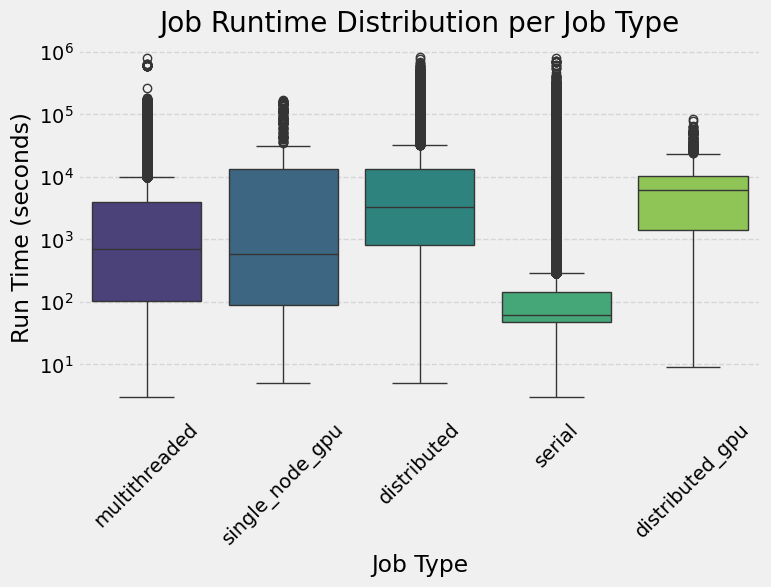

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of runtime per job_type
plt.figure(figsize=(8, 5))
sns.boxplot(x='job_type', y='run_time', data=df, palette='viridis')
plt.title("Job Runtime Distribution per Job Type")
plt.xlabel("Job Type")
plt.ylabel("Run Time (seconds)")
plt.yscale("log")  # optional: use log scale if you have wide range
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [17]:
import pandas as pd

# Assuming 'run_time' is the column in your dataframe
# Example: df is your dataframe that contains the 'run_time' column in seconds

# Convert run_time to a pandas Series if it's in the DataFrame
run_time_data = df['run_time']

# Get basic descriptive statistics
min_time = run_time_data.min()
max_time = run_time_data.max()
mean_time = run_time_data.mean()
median_time = run_time_data.median()
std_time = run_time_data.std()

# Convert to a more human-readable format if needed (e.g., minutes or days)
min_time_minutes = min_time / 60  # Convert seconds to minutes
max_time_days = max_time / (60 * 60 * 24)  # Convert seconds to days

# Output the basic statistics
print(f"Minimum runtime: {min_time} seconds ({min_time_minutes:.2f} minutes)")
print(f"Maximum runtime: {max_time} seconds ({max_time_days:.2f} days)")
print(f"Mean runtime: {mean_time} seconds")
print(f"Median runtime: {median_time} seconds")
print(f"Standard Deviation: {std_time} seconds")


Minimum runtime: 3.0 seconds (0.05 minutes)
Maximum runtime: 827806.0 seconds (9.58 days)
Mean runtime: 5024.657776884751 seconds
Median runtime: 82.0 seconds
Standard Deviation: 21649.960449652976 seconds


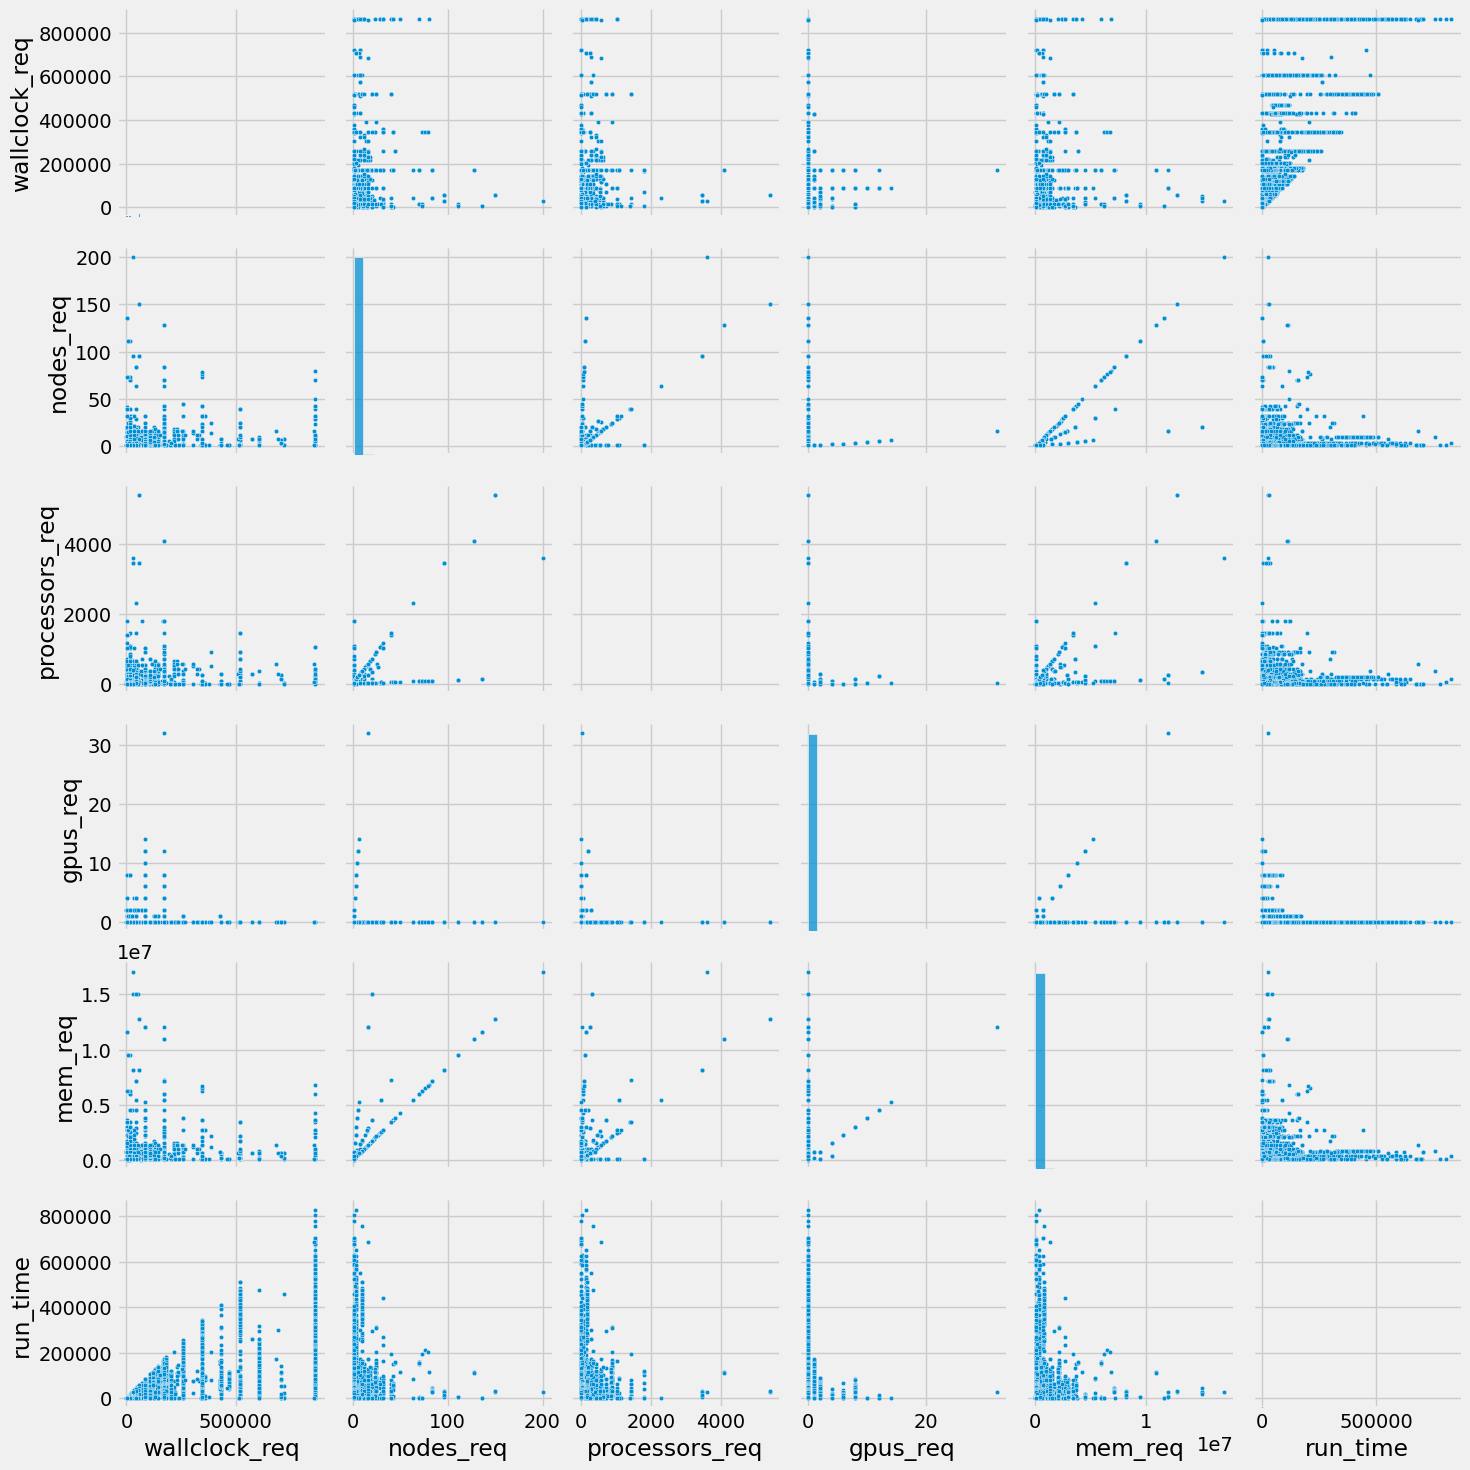

In [25]:
# Select only numeric columns (to avoid issues)
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['job_id'])

# Generate the pair plot
sns.pairplot(numeric_cols, plot_kws={'s': 10})  # 's' controls dot size

## Runtime distribution

{'whiskers': [<matplotlib.lines.Line2D at 0x2677463c950>,
 'caps': [<matplotlib.lines.Line2D at 0x2677463d8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x267745ded50>],
 'medians': [<matplotlib.lines.Line2D at 0x2677463dc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2677463df10>],
 'means': []}

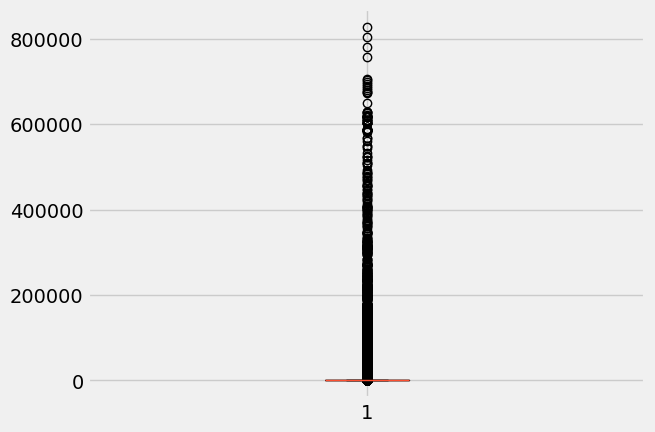

In [26]:
plt.boxplot('run_time', data=df)

## Runtime over time

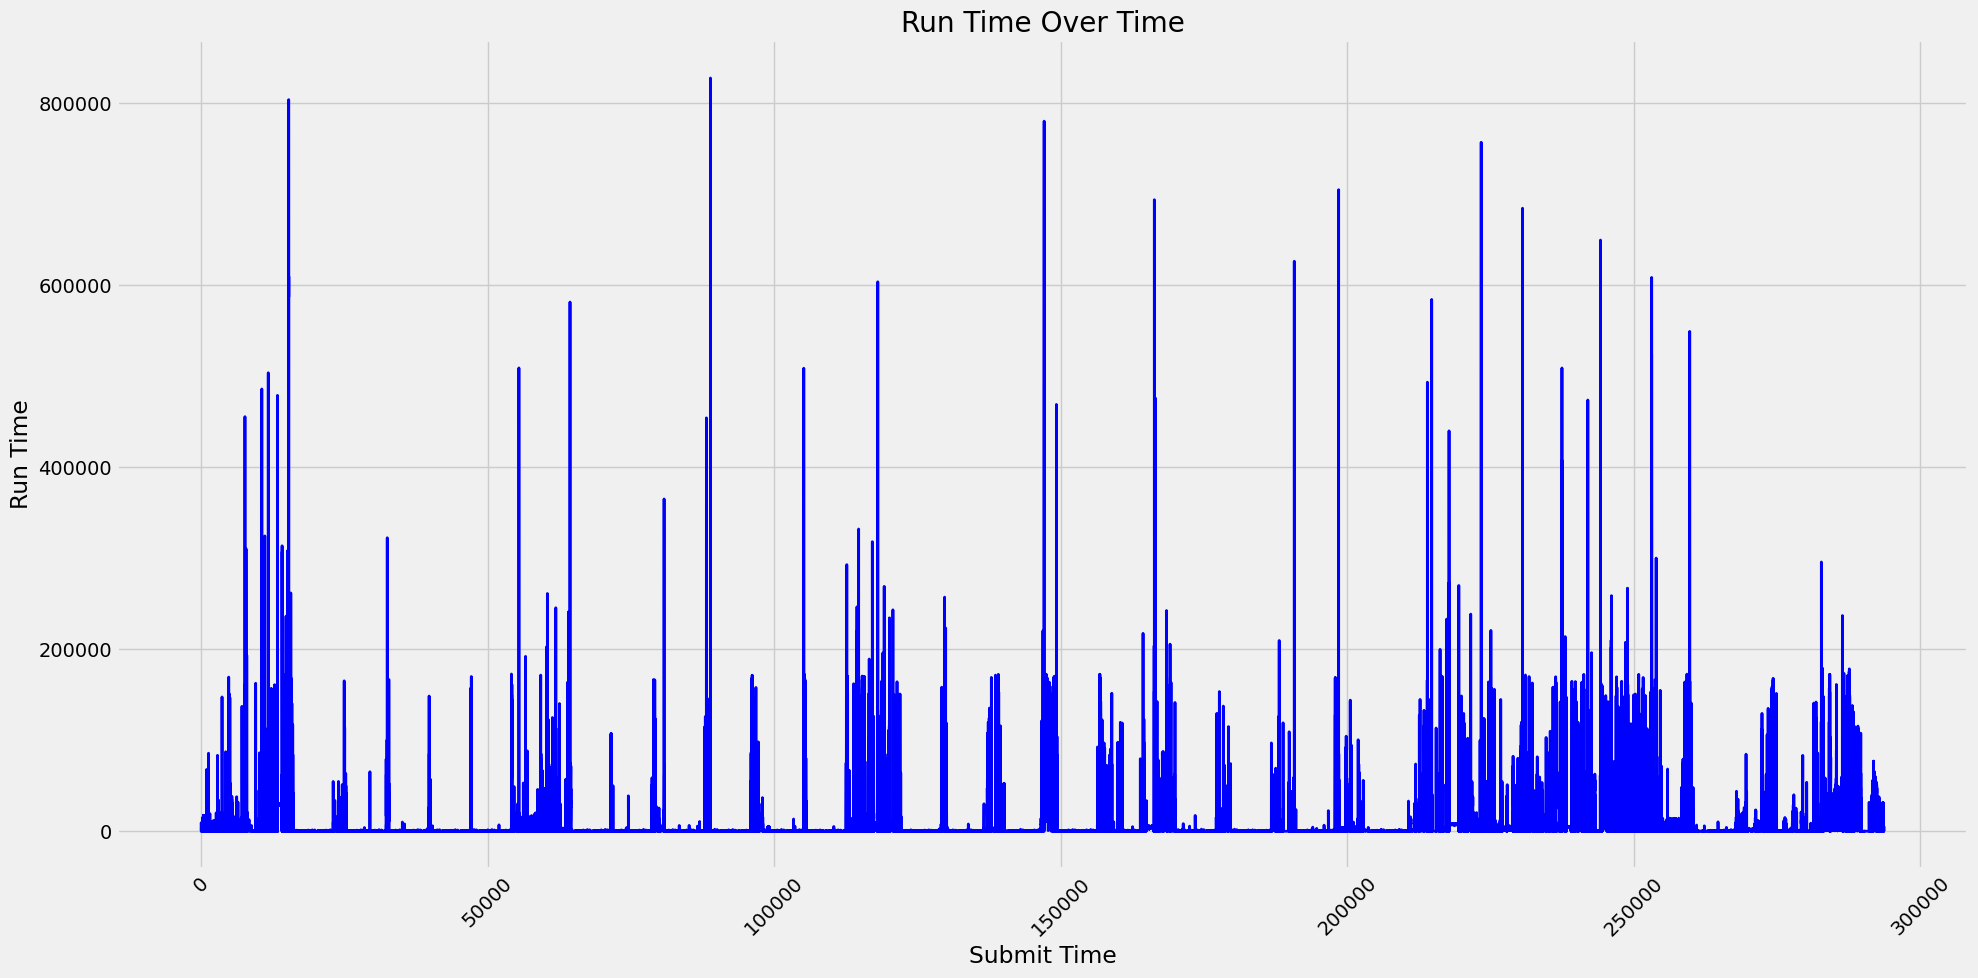

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10)) 

plt.plot(df.index, df['run_time'], linestyle='-', linewidth=2, color='b')

plt.xlabel('Submit Time')
plt.ylabel('Run Time')
plt.title('Run Time Over Time')
plt.grid(True)

plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Data understanding

In [ ]:
df.shape

(295948, 21)

In [29]:
df.describe()

,job_id,wallclock_req,nodes_req,processors_req,gpus_req,mem_req,run_time
count,2.936330e+05,293633.000000,293633.000000,293633.000000,293633.000000,2.936330e+05,293633.000000
mean,1.146731e+07,45296.287611,1.330634,18.901598,0.032670,1.346334e+05,5024.657777
std,1.053431e+05,72034.289642,2.565700,72.158847,0.406572,2.840960e+05,21649.960450
min,1.129360e+07,60.000000,1.000000,1.000000,0.000000,5.000000e+03,3.000000
25%,1.137537e+07,14400.000000,1.000000,1.000000,0.000000,8.524800e+04,50.000000
50%,1.146445e+07,14400.000000,1.000000,1.000000,0.000000,8.524800e+04,82.000000
75%,1.154664e+07,36000.000000,1.000000,24.000000,0.000000,8.524800e+04,905.000000
max,1.168475e+07,864000.000000,200.000000,5400.000000,32.000000,1.704960e+07,827806.000000


## Seasonality insights

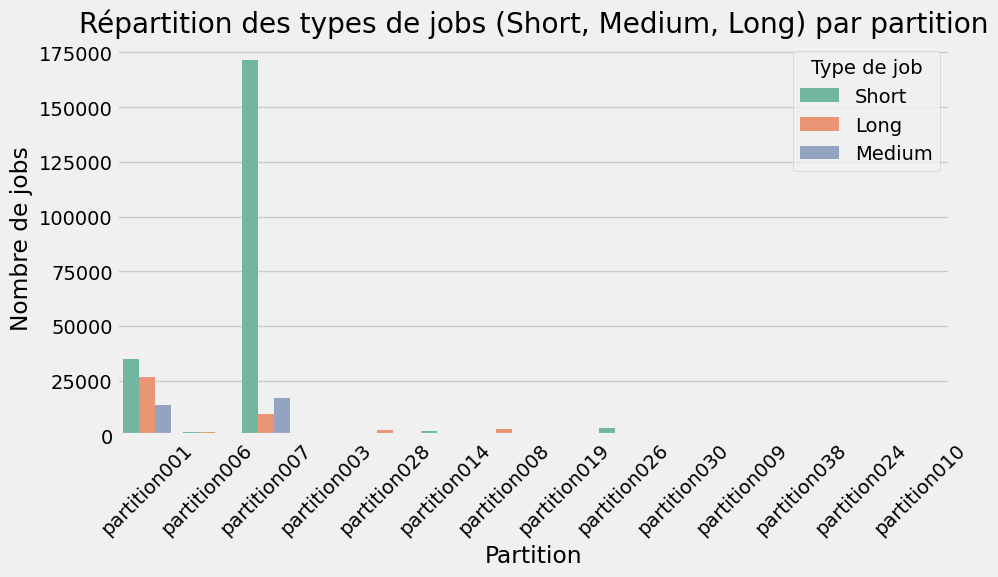

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les conditions
conditions = [
    df["run_time"] < 600,# 10min
    df["run_time"] < 3600 # 1h
]
choices = ["Short", "Medium"]

df["job_length_type"] = np.select(conditions, choices, default="Long")

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="partition", hue="job_length_type", palette="Set2")
plt.title("Répartition des types de jobs (Short, Medium, Long) par partition")
plt.xlabel("Partition")
plt.ylabel("Nombre de jobs")
plt.legend(title="Type de job")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


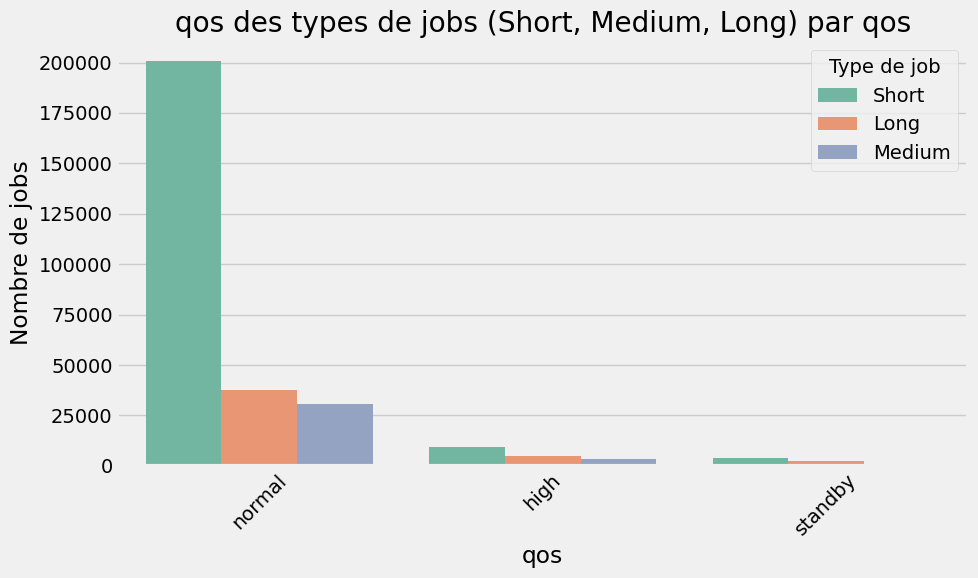

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="qos", hue="job_length_type", palette="Set2")
plt.title("qos des types de jobs (Short, Medium, Long) par qos")
plt.xlabel("qos")
plt.ylabel("Nombre de jobs")
plt.legend(title="Type de job")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Partition Qos associations

In [ ]:
# On enlève les doublons pour éviter la redondance
partition_qos_map = df[['partition', 'qos']].drop_duplicates()

# Groupement : chaque partition → liste des QoS uniques associées
partition_to_qos = partition_qos_map.groupby('partition')['qos'].apply(lambda x: sorted(set(x))).reset_index()

# Affichage
print(partition_to_qos)


       partition                      qos
0   partition001  [high, normal, standby]
1   partition003  [high, normal, standby]
2   partition006           [high, normal]
3   partition007  [high, normal, standby]
4   partition008  [high, normal, standby]
5   partition009           [high, normal]
6   partition010                 [normal]
7   partition014           [high, normal]
8   partition019           [high, normal]
9   partition024                 [normal]
10  partition026        [normal, standby]
11  partition028                [standby]
12  partition030                [standby]
13  partition038                [standby]


## Detect trend

C:\Users\Soraya Khene\AppData\Local\Temp\ipykernel_17948\3747471981.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['week'] = df_recent['submit_time'].dt.isocalendar().week
C:\Users\Soraya Khene\AppData\Local\Temp\ipykernel_17948\3747471981.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['day_name'] = df_recent['submit_time'].dt.day_name()
C:\Users\Soraya Khene\AppData\Local\Temp\ipykernel_17948\3747471981.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of

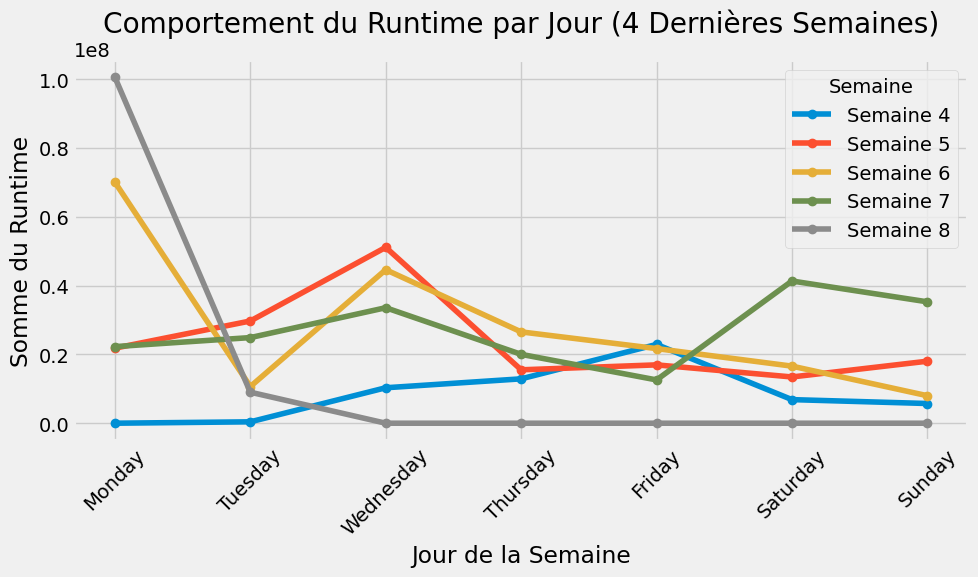

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Ensure datetime format
df['submit_time'] = pd.to_datetime(df['submit_time'])

# Filter data: last 4 weeks from latest date
latest_date = df['submit_time'].max()
four_weeks_ago = latest_date - timedelta(weeks=4)
df_recent = df[df['submit_time'] >= four_weeks_ago]

# Extract week and day name
df_recent['week'] = df_recent['submit_time'].dt.isocalendar().week
df_recent['day_name'] = df_recent['submit_time'].dt.day_name()

# Optional: Ensure correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_recent['day_name'] = pd.Categorical(df_recent['day_name'], categories=day_order, ordered=True)

# Group by week and day name
daily_runtime = df_recent.groupby(['week', 'day_name'])['run_time'].sum().unstack(level=0)

# Plot
plt.figure(figsize=(10, 6))
for week in daily_runtime.columns:
    plt.plot(daily_runtime.index, daily_runtime[week], label=f'Semaine {week}', marker='o')

plt.title("Comportement du Runtime par Jour (4 Dernières Semaines)")
plt.xlabel("Jour de la Semaine")
plt.ylabel("Somme du Runtime")
plt.legend(title="Semaine")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Features distribution

<Axes: xlabel='partition'>

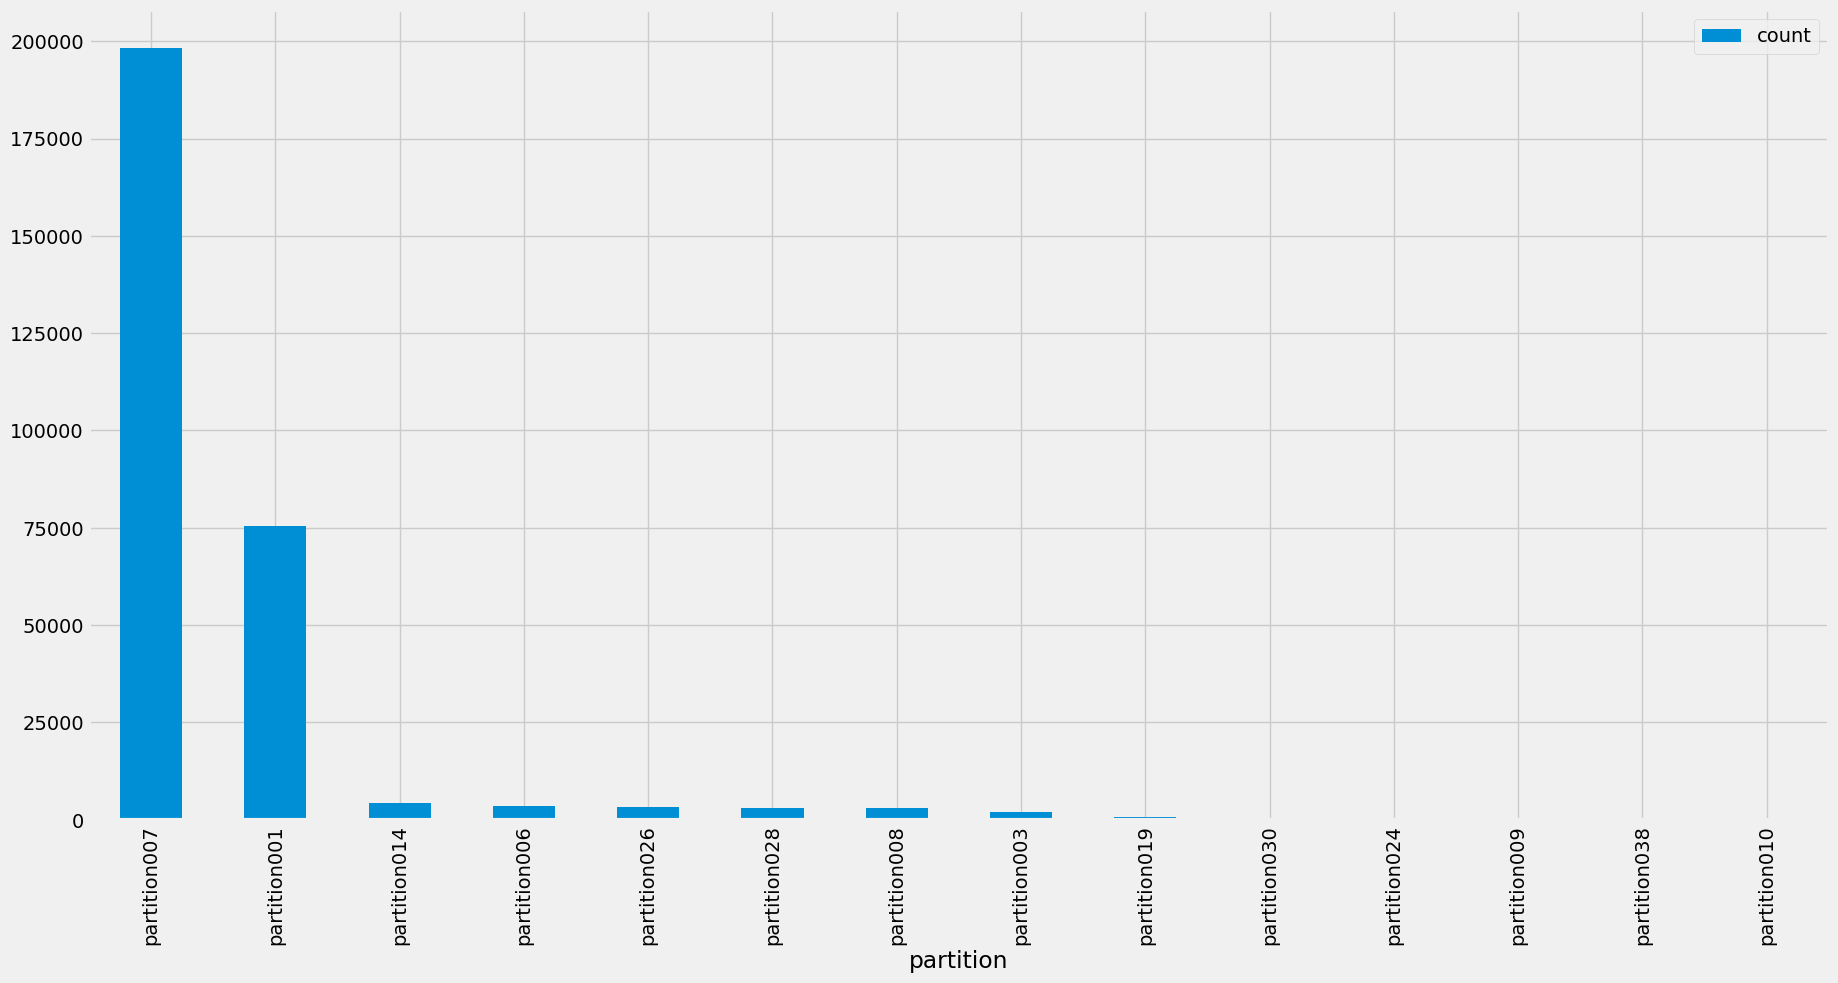

In [43]:
pd.DataFrame(df['partition'].value_counts()).plot(kind='bar',figsize=(20,10))

<Axes: xlabel='user'>

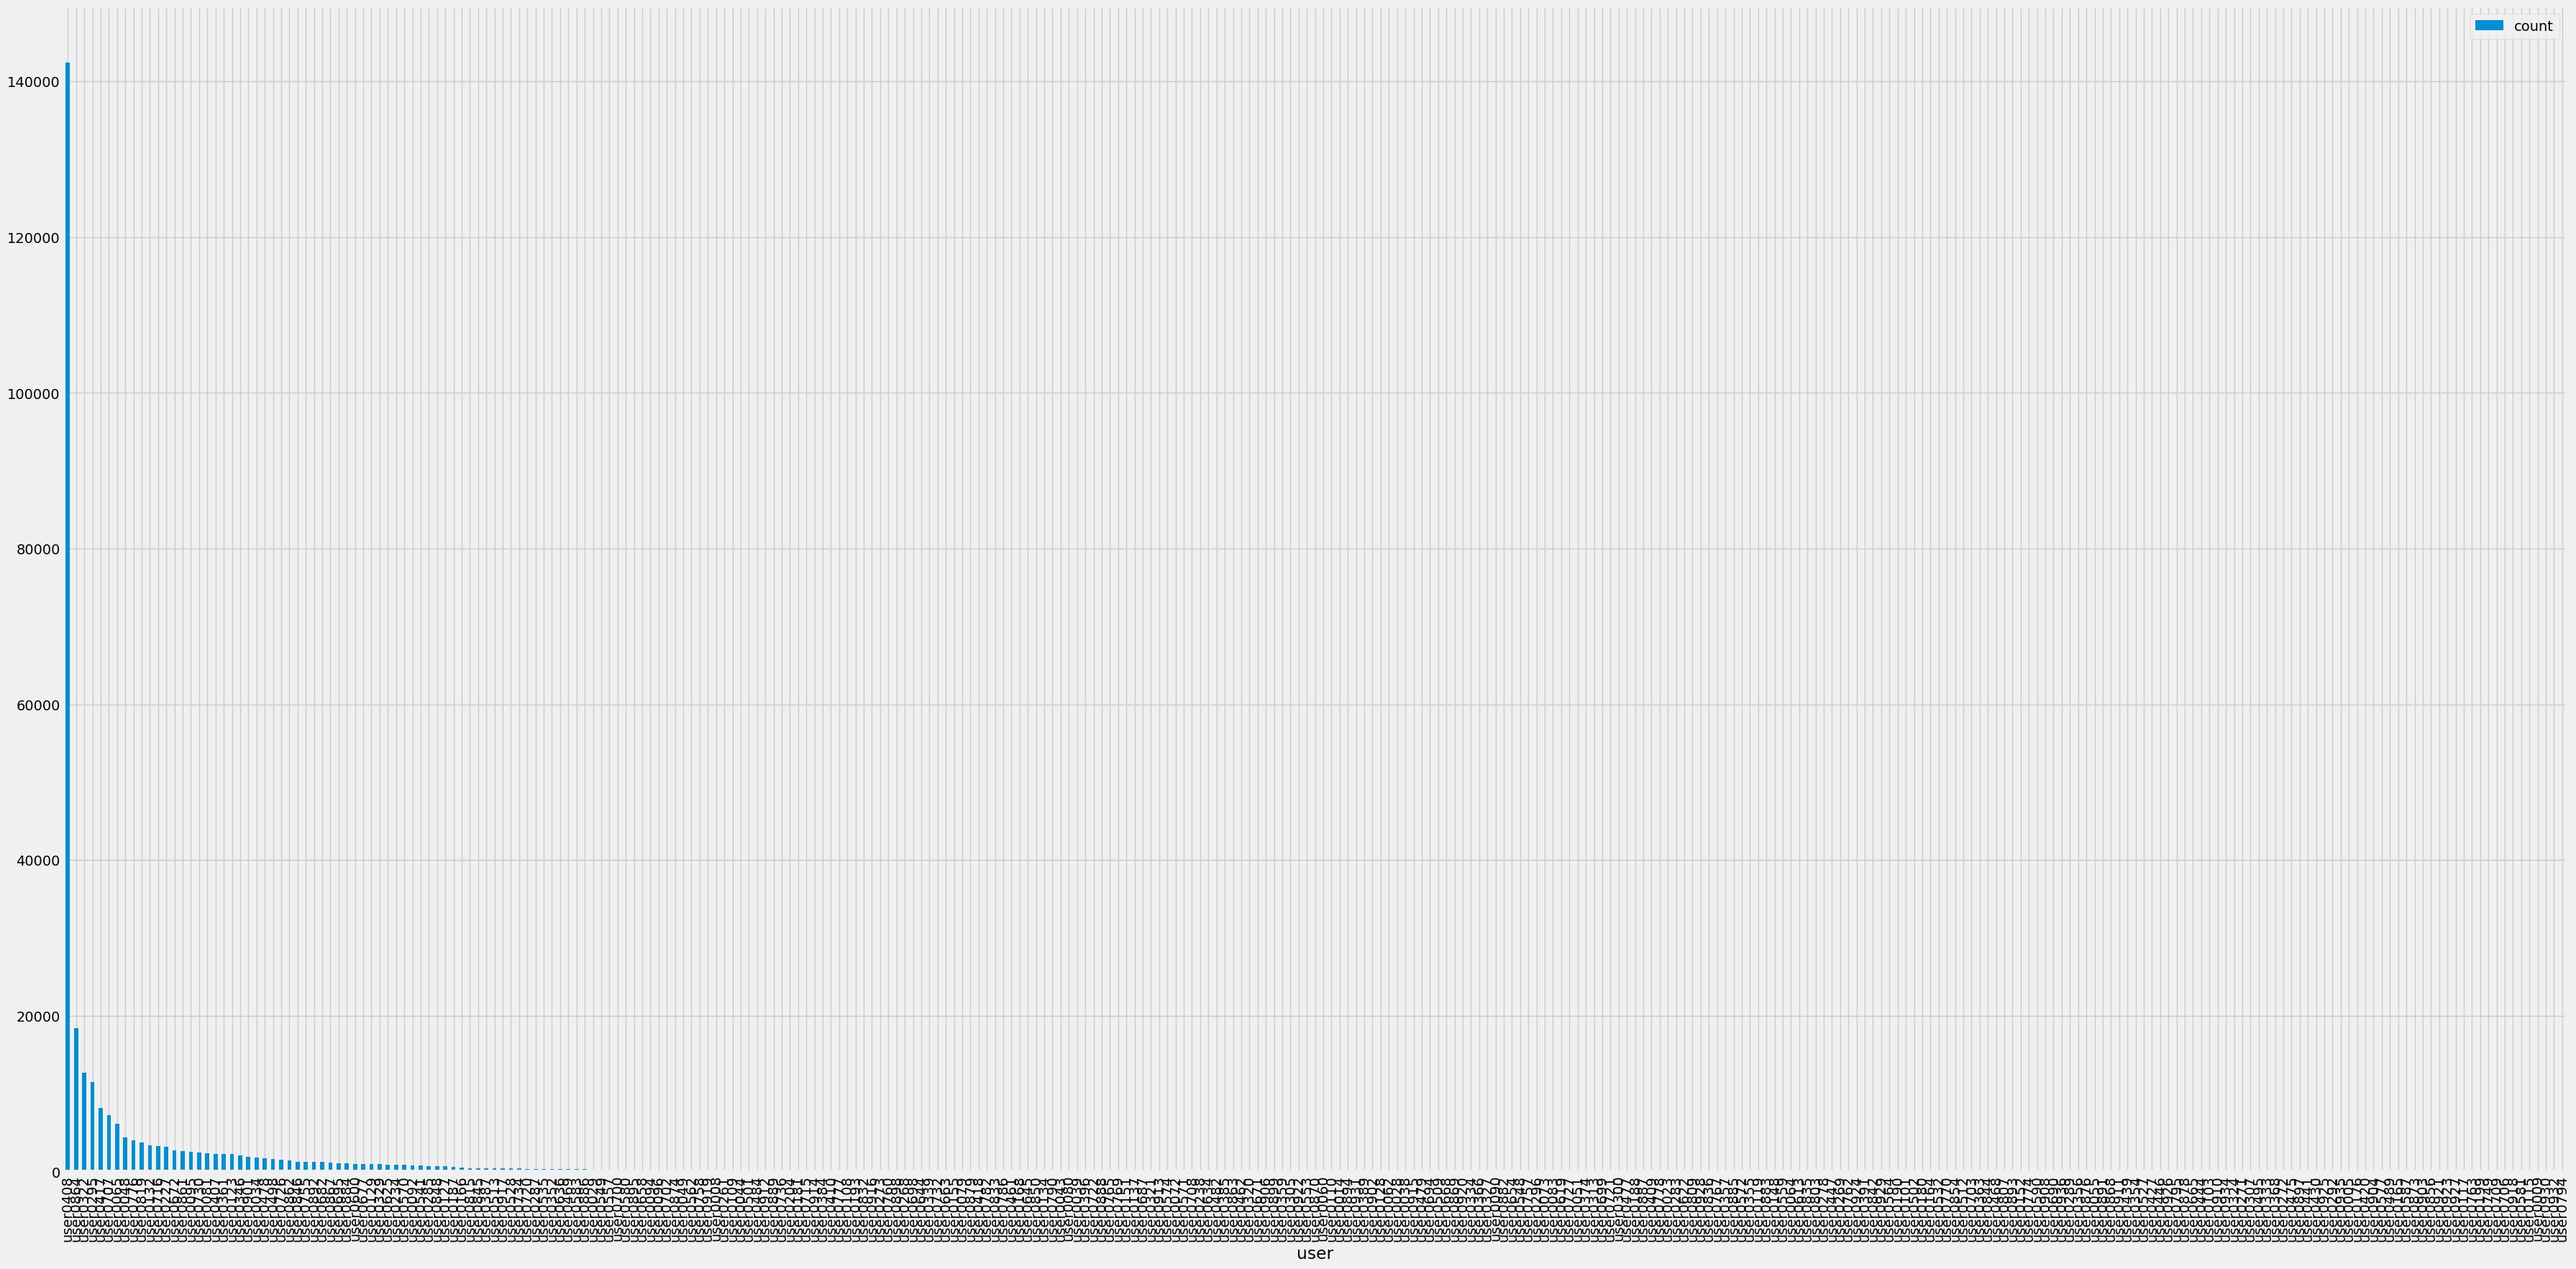

In [ ]:
pd.DataFrame(df['user'].value_counts()).plot(kind='bar',figsize=(40,20))

<Axes: xlabel='qos'>

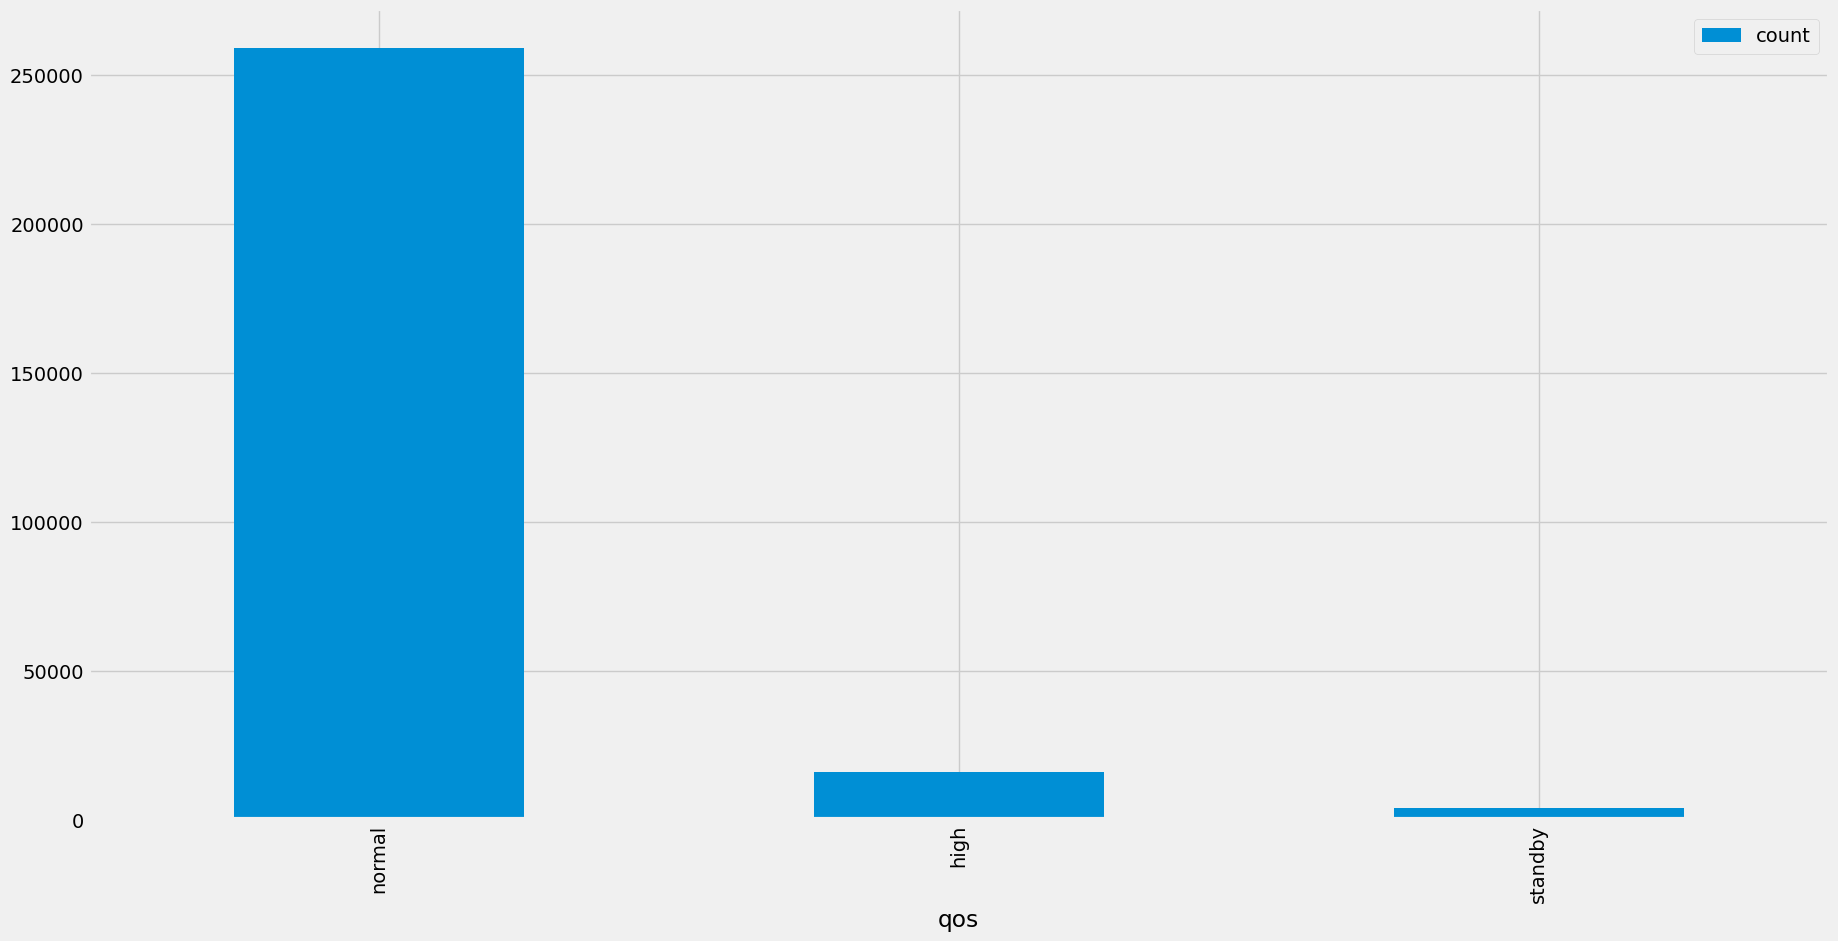

In [ ]:
# pd.DataFrame(df['qos'].value_counts()).plot(kind='bar', figsize=(20,10), logy=True)
pd.DataFrame(df['qos'].value_counts()).plot(kind='bar', figsize=(20,10))


In [ ]:
df['qos'].value_counts()

qos
normal     270307
high        19255
standby      6386
Name: count, dtype: int64

In [ ]:
df['partition'].value_counts()

partition
partition007    200452
partition001     75569
partition014      4308
partition006      3520
partition026      3330
partition028      3002
partition008      2991
partition003      1936
partition019       765
partition030        42
partition024        24
partition009         5
partition038         3
partition010         1
Name: count, dtype: int64

In [44]:
avg_run_time_per_work_dir = df.groupby('qos')['run_time'].mean()
avg_run_time_per_work_dir.head().sort_values(ascending=False)

qos
standby    28055.003915
high        9789.287971
normal      4155.059822
Name: run_time, dtype: float64

## Wllclock requested vs runtime

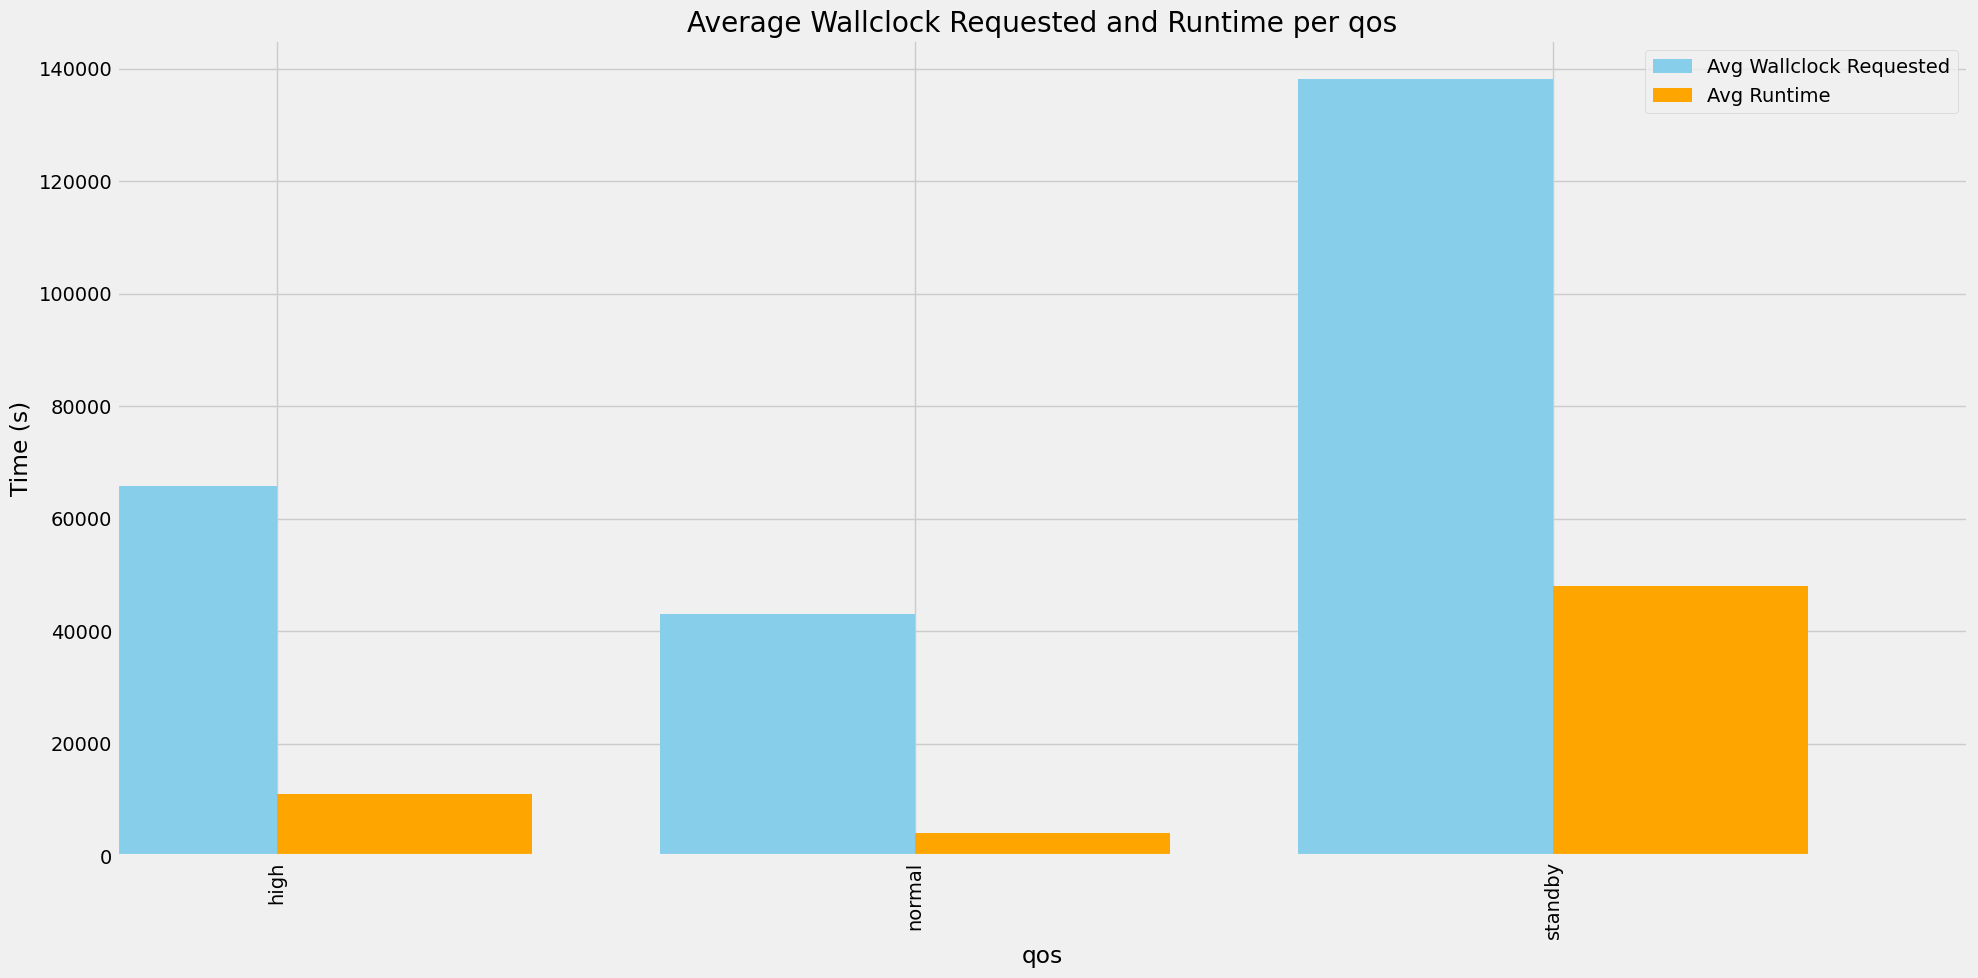

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the averages per qos
avg_wallclock = df.groupby('qos')['wallclock_req'].mean()
avg_runtime = df.groupby('qos')['run_time'].mean()

# Create the bar chart
plt.figure(figsize=(20, 10))

# Bar for wallclock_req
avg_wallclock.plot(kind='bar', color='skyblue', width=0.4, position=1, label='Avg Wallclock Requested')

# Bar for run_time (same qoss, aligned)
avg_runtime.plot(kind='bar', color='orange', width=0.4, position=0, label='Avg Runtime')

# Add labels and title
plt.title('Average Wallclock Requested and Runtime per qos')
plt.xlabel('qos')
plt.ylabel('Time (s)')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


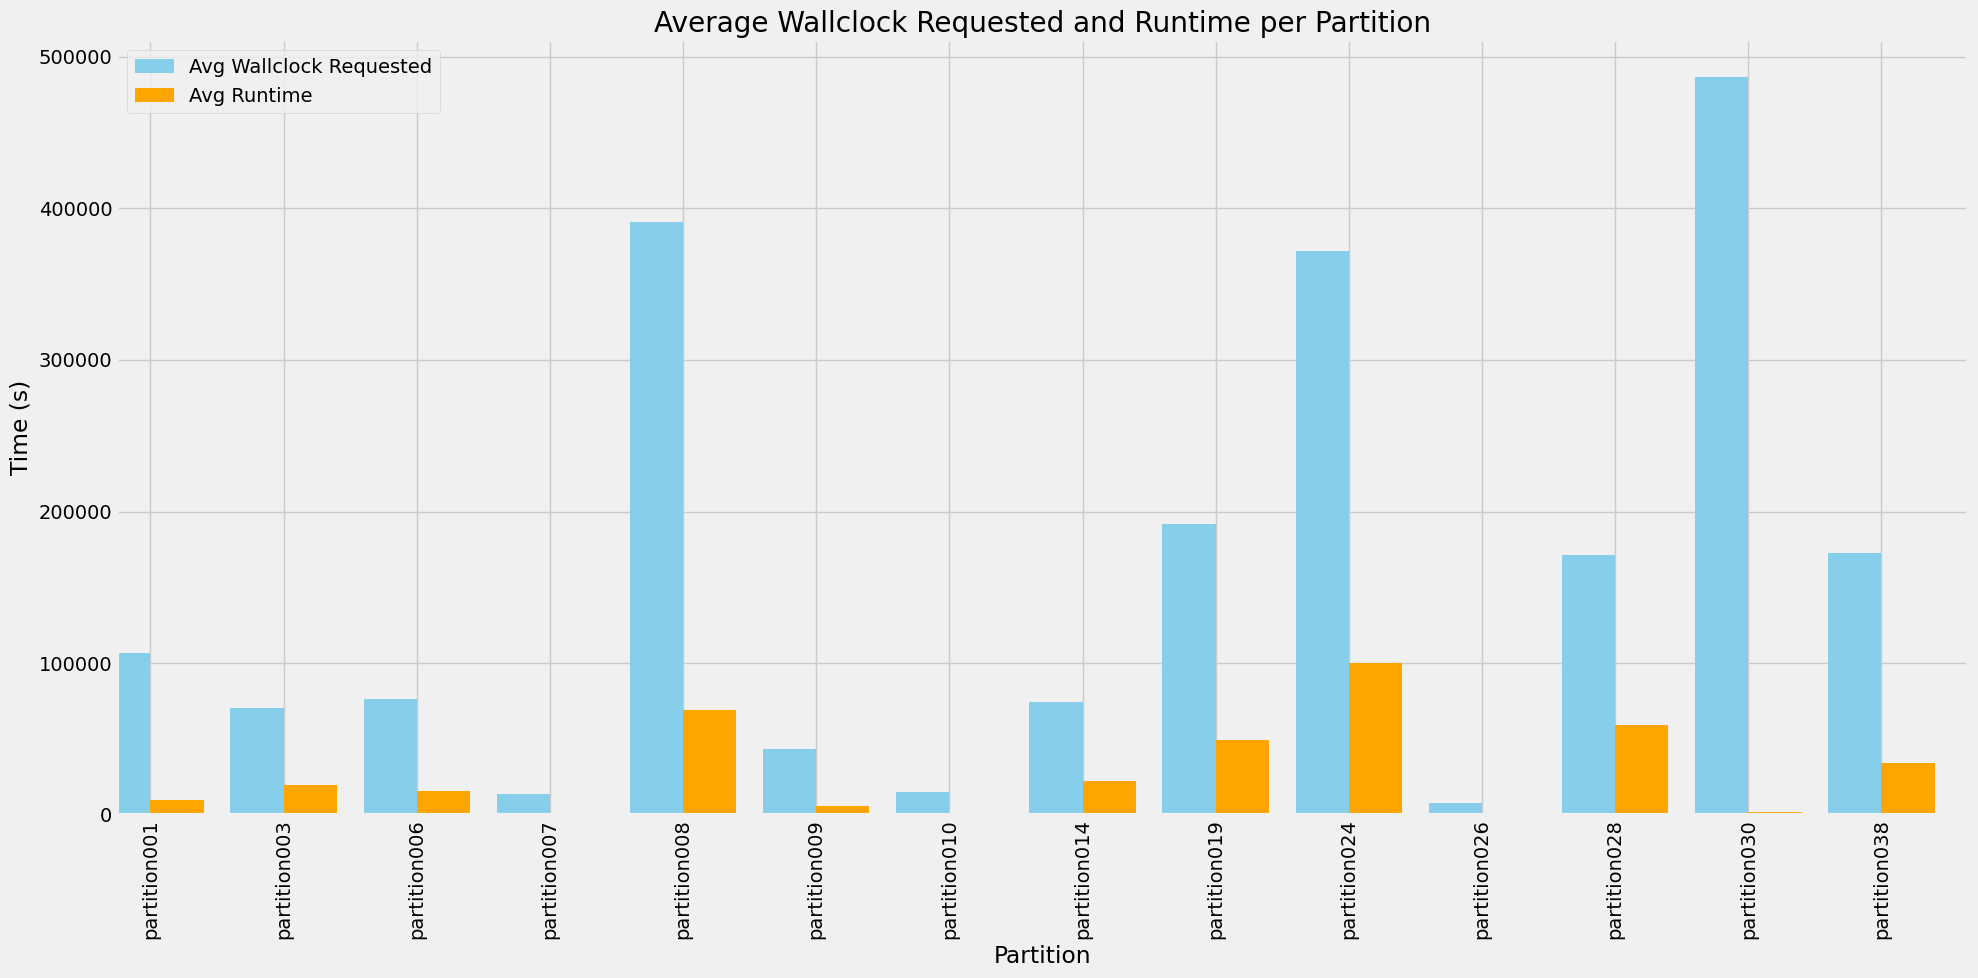

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the averages per partition
avg_wallclock = df.groupby('partition')['wallclock_req'].mean()
avg_runtime = df.groupby('partition')['run_time'].mean()

# Create the bar chart
plt.figure(figsize=(20, 10))

# Bar for wallclock_req
avg_wallclock.plot(kind='bar', color='skyblue', width=0.4, position=1, label='Avg Wallclock Requested')

# Bar for run_time (same partitions, aligned)
avg_runtime.plot(kind='bar', color='orange', width=0.4, position=0, label='Avg Runtime')

# Add labels and title
plt.title('Average Wallclock Requested and Runtime per Partition')
plt.xlabel('Partition')
plt.ylabel('Time (s)')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


# NANS

In [ ]:
df.isna().sum()

user              0
account           0
partition         0
qos               0
wallclock_req     0
nodes_req         0
processors_req    0
gpus_req          0
mem_req           0
submit_time       0
end_time          0
run_time          0
name              0
job_type          0
dencity           0
dtype: int64

## Runtime <= 0

In [45]:
df[df['run_time'] <= 0]

,job_id,user,account,partition,qos,wallclock_req,nodes_req,processors_req,gpus_req,mem_req,submit_time,end_time,run_time,name,work_dir,submit_line,job_length,submit_time_


# Dupliactes 

In [ ]:
# Find unique duplicated rows
unique_duplicated_rows = df[df.duplicated()].drop_duplicates()

print(f"Number of unique duplicated rows: {len(unique_duplicated_rows)}")

Number of unique duplicated rows: 0


In [ ]:
duplicated_rows = df[df.duplicated(keep=False)]  # Keep all occurrences of duplicates

# Group by the duplicate row values and collect their indices
duplicates_with_indices = duplicated_rows.groupby(list(df.columns)).apply(lambda x: list(x.index))
duplicates_df = df.empty
if duplicates_with_indices.empty:
    print("No duplicates found")
else:
    # Convert to a DataFrame for better readability
    duplicates_df = duplicates_with_indices.reset_index(name="Duplicate_Indices")

No duplicates found


C:\Users\Soraya Khene\AppData\Local\Temp\ipykernel_9724\1178657834.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicates_with_indices = duplicated_rows.groupby(list(df.columns)).apply(lambda x: list(x.index))


In [ ]:
df_dup = df.drop(columns=['run_time'])[df.drop(columns=['run_time']).duplicated()].drop_duplicates()

In [ ]:
# Display results
duplicates_df

False

In [ ]:
# Users can have multiple accounts
# Group by 'user' and count unique 'account' values
user_account_counts = df.groupby('user')['account'].nunique()

# Filter users with more than one account
users_with_multiple_accounts = user_account_counts[user_account_counts > 1]

# Display the result
print(f"Number of users with multiple accounts: {len(users_with_multiple_accounts)}")
users_with_multiple_accounts

Number of users with multiple accounts: 91


user
user0023    2
user0028    2
user0029    3
user0038    2
user0043    4
           ..
user0869    2
user0887    2
user0894    2
user0901    2
user0910    2
Name: account, Length: 91, dtype: int64

In [ ]:
print(df['gpus_req'].nunique())
print(df['gpus_req'].unique())


10
[ 0  2  1  6  8  4 10 14 12 32]


In [ ]:
df['processors_req'].nunique()

88

In [ ]:
df['nodes_req'].nunique()

44

## Memory Missing values

In [47]:
print(df[df['mem_req'] == 0].shape[0], "rows with mem_req == 0")

0 rows with mem_req == 0


## Runtime with and aithout outliers

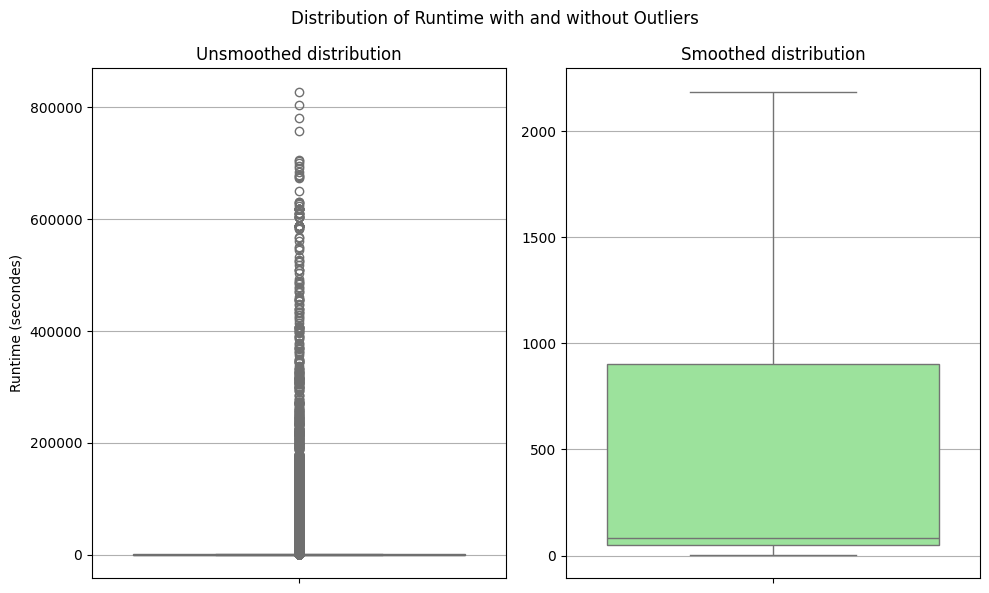

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Premier subplot : avec outliers
plt.subplot(1, 2, 1)
sns.boxplot(y='run_time', data=df, showfliers=True, color='skyblue')
plt.title("Unsmoothed distribution")
plt.ylabel("Runtime (secondes)")
plt.grid(True, axis='y')

# Deuxième subplot : sans outliers
plt.subplot(1, 2, 2)
sns.boxplot(y='run_time', data=df, showfliers=False, color='lightgreen')
plt.title("Smoothed distribution")
plt.ylabel("")  # Pas besoin de répéter
plt.grid(True, axis='y')

plt.suptitle("Distribution of Runtime with and without Outliers")
plt.tight_layout()
plt.show()


# Les users qui surestiment

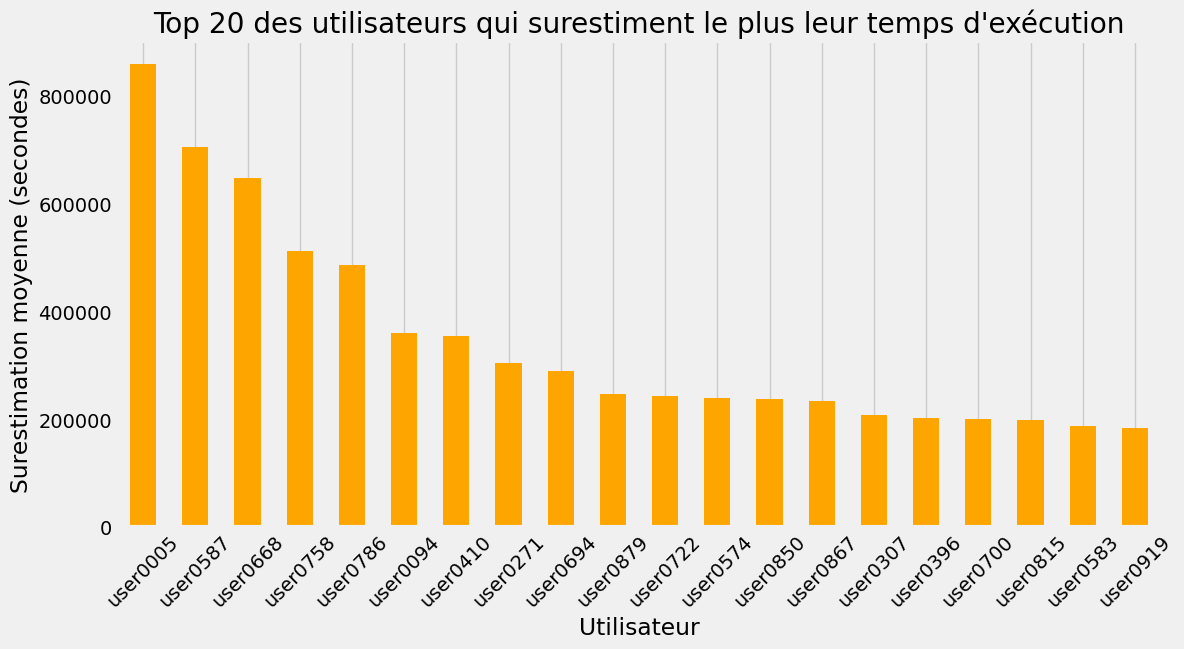

In [ ]:
df_ = df.copy()
df_.dropna()
# Calculer la différence entre wallclock_req et run_time
df_['overestimation'] = df_['wallclock_req'] - df_['run_time']

# Calculer la moyenne d'overestimation pour chaque utilisateur
user_overestimation = df_.groupby('user')['overestimation'].mean()

# Trier les utilisateurs par overestimation moyenne
user_overestimation_sorted = user_overestimation.sort_values(ascending=False)

# Visualiser les utilisateurs qui surestiment le plus
plt.figure(figsize=(12, 6))
user_overestimation_sorted.head(20).plot(kind='bar', color='orange')
plt.title('Top 20 des utilisateurs qui surestiment le plus leur temps d\'exécution')
plt.xlabel('Utilisateur')
plt.ylabel('Surestimation moyenne (secondes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Run time distribution for jobs in each partition/qos
to see the effect of partition on runtime

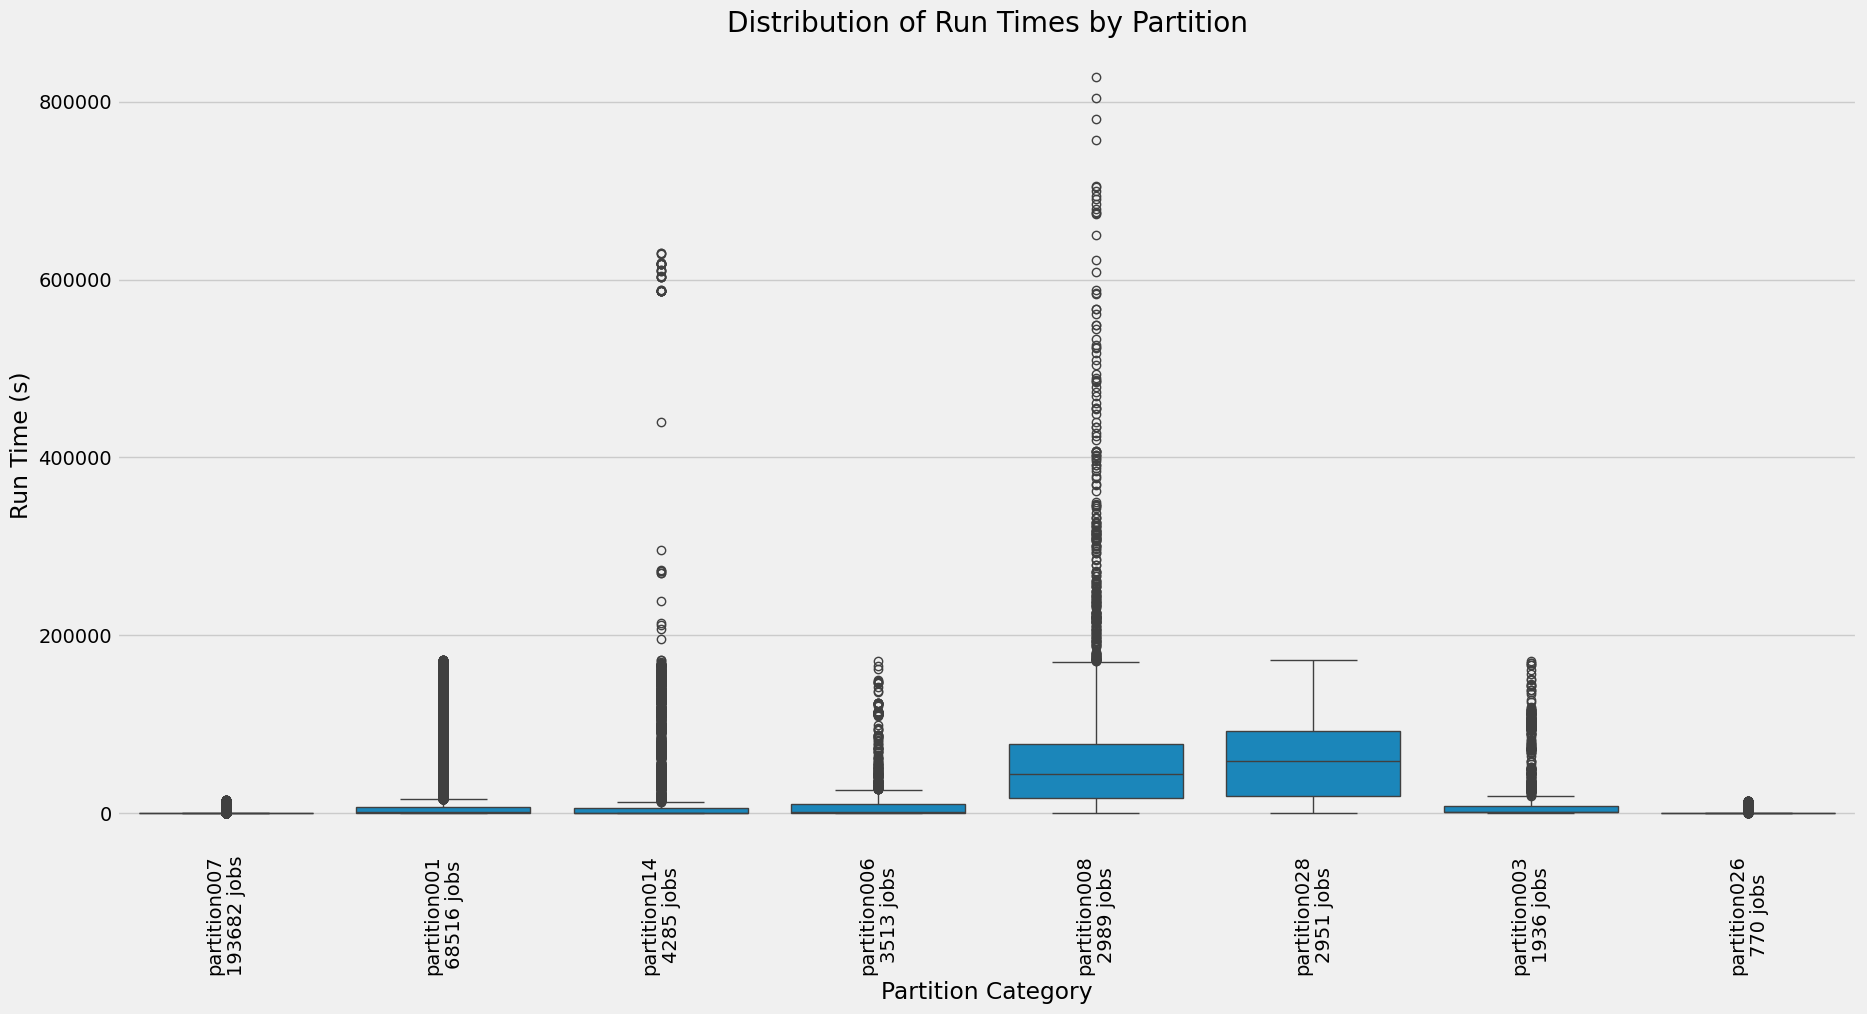

In [ ]:
# Count the number of jobs in each partition
job_counts = df['partition'].value_counts()

# Create custom labels with partition names and job counts
custom_labels = [f"{partition}\n{count} jobs" for partition, count in job_counts.items()]

# Create the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='partition', y='run_time', data=df, order=job_counts.index)

# Set custom x-axis labels
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=90)

# Add titles and labels
plt.title('Distribution of Run Times by Partition')
plt.ylabel('Run Time (s)')
plt.xlabel('Partition Category')

# Show the plot
plt.show()

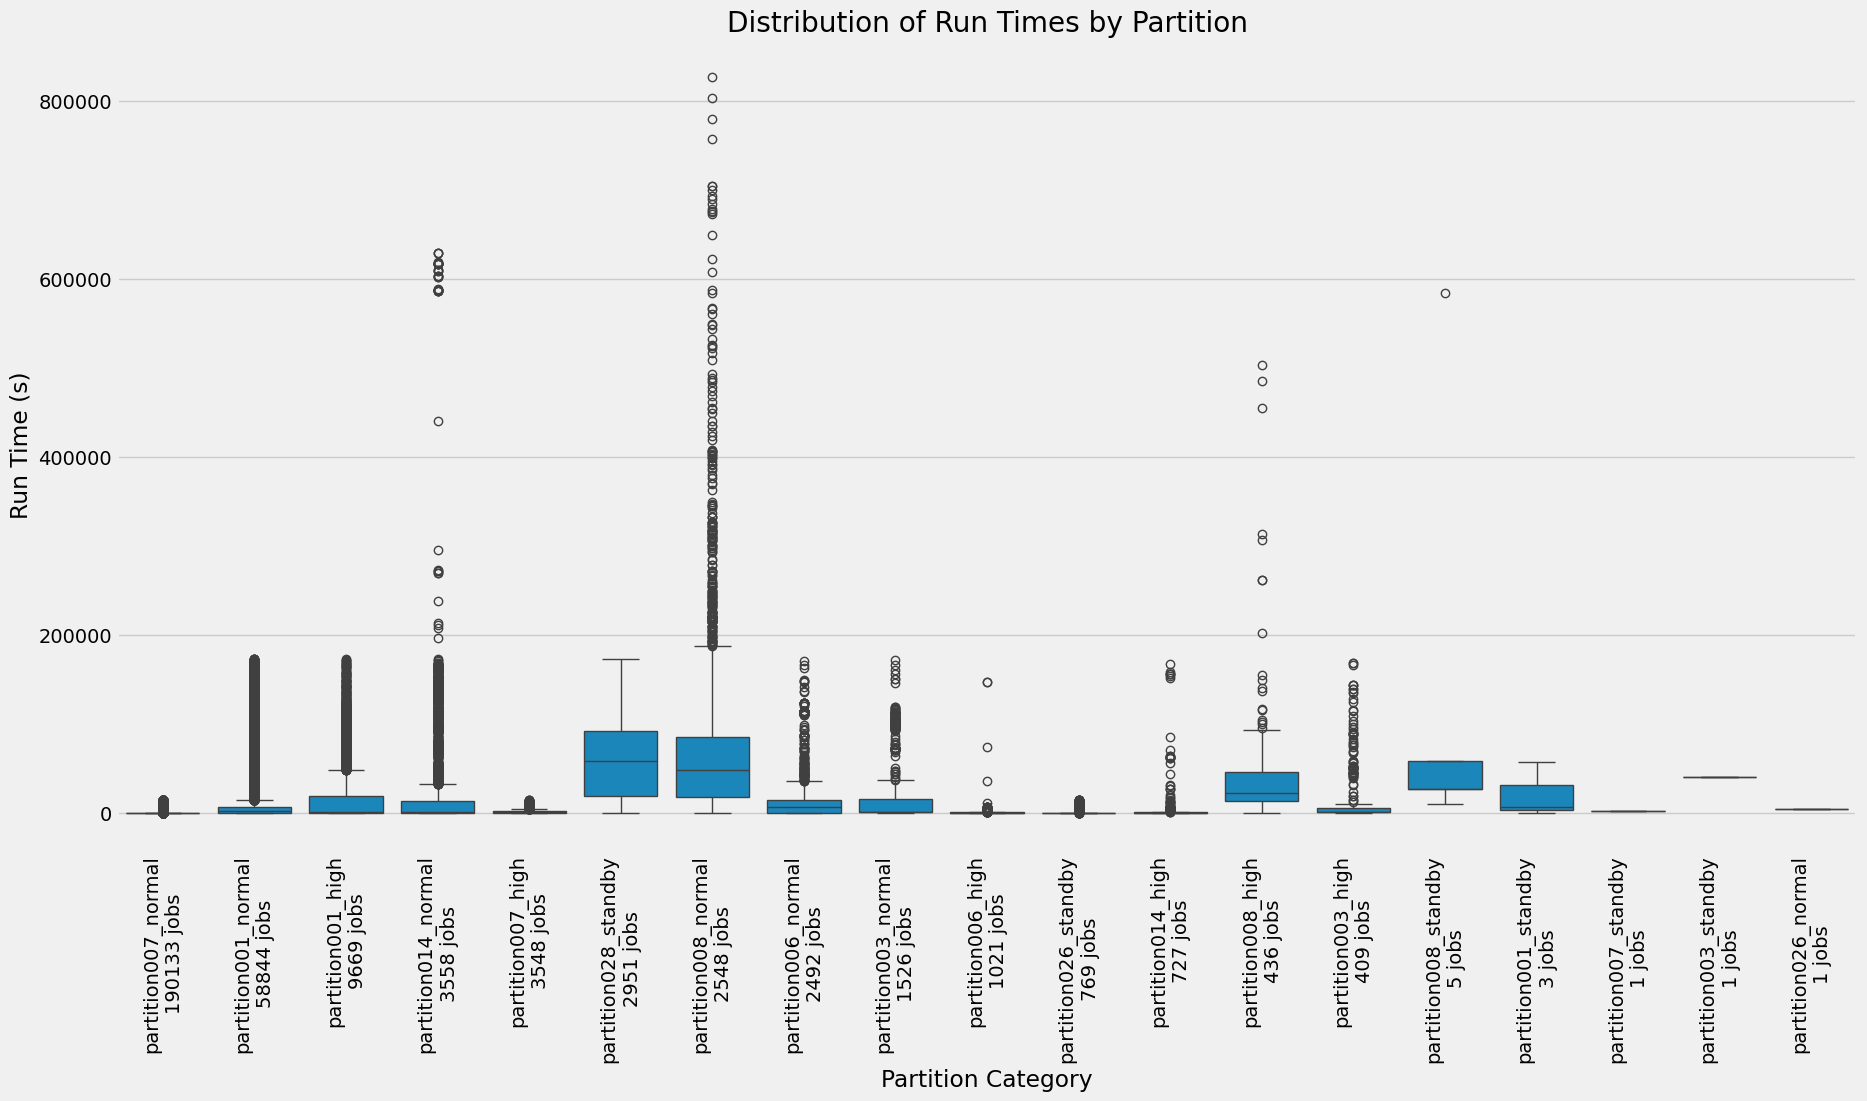

In [ ]:
df["partition_qos"] = df["partition"] + "_" + df["qos"]
# Count the number of jobs in each partition
job_counts = df['partition_qos'].value_counts()

# Create custom labels with partition names and job counts
custom_labels = [f"{partition}\n{count} jobs" for partition, count in job_counts.items()]

# Create the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='partition_qos', y='run_time', data=df, order=job_counts.index)

# Set custom x-axis labels
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=90)

# Add titles and labels
plt.title('Distribution of Run Times by Partition')
plt.ylabel('Run Time (s)')
plt.xlabel('Partition Category')

# Show the plot
plt.show()

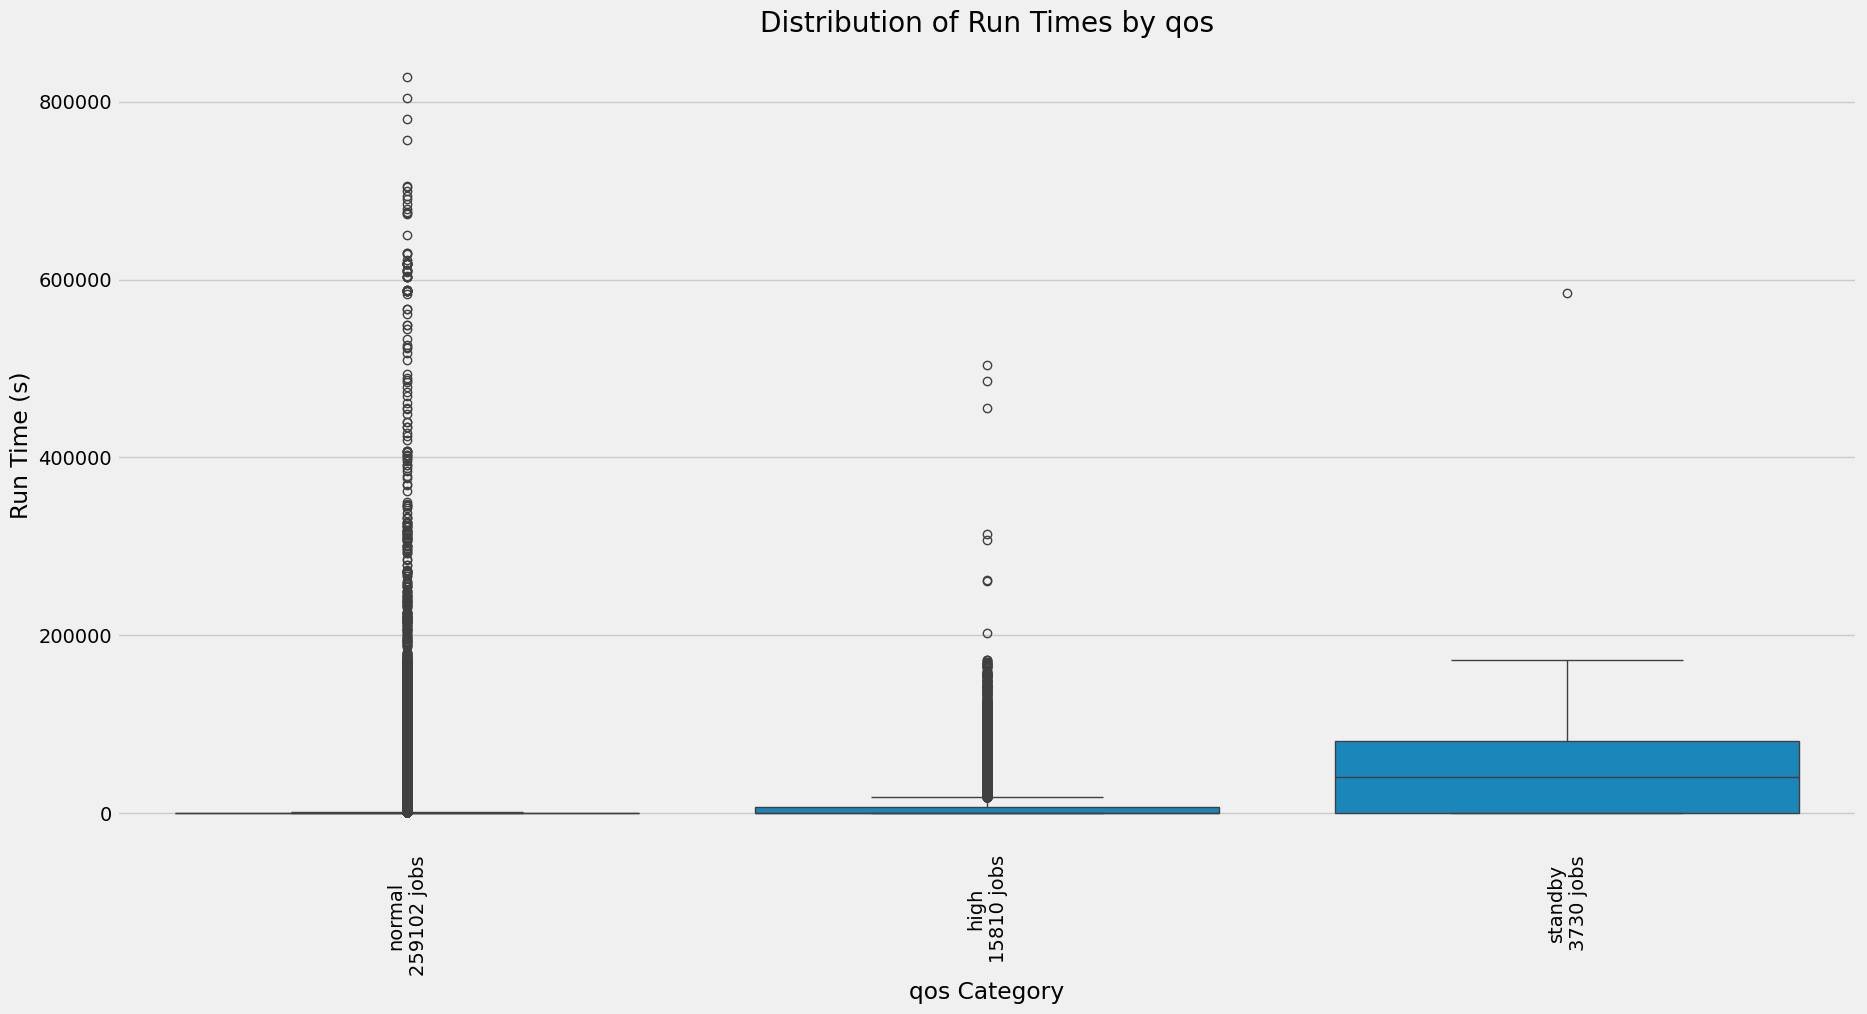

In [ ]:
# Count the number of jobs in each qos
job_counts = df['qos'].value_counts()

# Create custom labels with qos names and job counts
custom_labels = [f"{qos}\n{count} jobs" for qos, count in job_counts.items()]

# Create the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='qos', y='run_time', data=df, order=job_counts.index)

# Set custom x-axis labels
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=90)

# Add titles and labels
plt.title('Distribution of Run Times by qos')
plt.ylabel('Run Time (s)')
plt.xlabel('qos Category')

# Show the plot
plt.show()

## Runtime vs Wallclock 

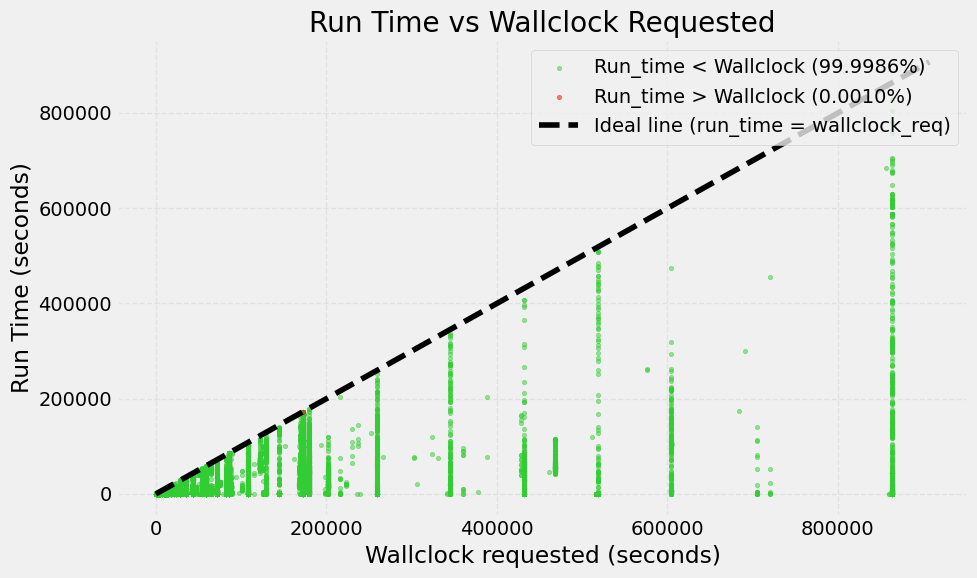

In [ ]:
import matplotlib.pyplot as plt

# Classify points
under = df['run_time'] < df['wallclock_req']   # ✅ Within requested
over = df['run_time'] > df['wallclock_req']    # ❌ Took longer than requested

# Calculate percentages
total = len(df)
pct_under = under.sum() / total * 100
pct_over = over.sum() / total * 100

plt.figure(figsize=(10, 6))

# Plot underestimates in green
plt.scatter(df['wallclock_req'][under], df['run_time'][under], color='limegreen', alpha=0.5, s=10, label=f'Run_time < Wallclock ({pct_under:.4f}%)')

# Plot overestimates in red
plt.scatter(df['wallclock_req'][over], df['run_time'][over], color='red', alpha=0.5, s=10, label=f'Run_time > Wallclock ({pct_over:.4f}%)')

# Plot ideal line: run_time = wallclock_req
max_val = max(df['wallclock_req'].max(), df['run_time'].max()) * 1.05
plt.plot([0, max_val], [0, max_val], 'k--', label='Ideal line (run_time = wallclock_req)')

# Formatting
plt.xlabel('Wallclock requested (seconds)')
plt.ylabel('Run Time (seconds)')
plt.title('Run Time vs Wallclock Requested')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Correlation

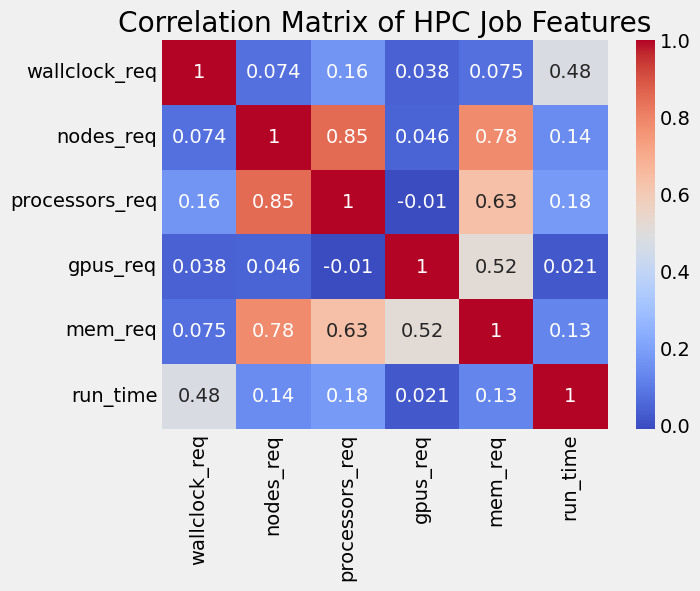

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Copy the data
df_ = df.copy()
# Step 3: Select numeric columns for correlation
df_cleaned = df_[['wallclock_req', 'nodes_req', 'processors_req', 'gpus_req',
                  'mem_req', 'run_time']]
df_cleaned = df_cleaned.iloc[:int(0.6 * len(df_cleaned))]
# Step 4: Drop any rows with missing values
df_cleaned = df_cleaned.dropna()

# Step 5: Compute and visualize the correlation matrix
correlation_matrix = df_cleaned.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of HPC Job Features")
plt.show()


# General

In [ ]:
first_date = df_['submit_time'].min()
last_date = df_['submit_time'].max()

print(f"First date: {first_date}")
print(f"Last date: {last_date}")

First date: 2023-01-01 00:01:03
Last date: 2023-02-21 23:20:14


In [ ]:
jobs_first_day = df_[df_['submit_time'].dt.date == first_date.date()]
print(f"Number of jobs submitted on the first day: {len(jobs_first_day)}")

Number of jobs submitted on the first day: 7442


# Anomalies

# Same job_id same characteristics different run_times and end_times
✅ These are job arrays and can be treated as distinct jobs : mechanism for submitting and managing collections of similar jobs quickly and easily; job arrays with millions of tasks can be submitted in milliseconds

In [ ]:
# Group by 'job_id' and filter out the ones with different 'run_time' values
duplicates = df_.groupby('job_id').filter(lambda x: len(x['run_time'].unique()) > 1)

In [ ]:
# Display the result
duplicates.head()  # Show the first 10 rows of the result

,job_id,user,account,partition,qos,wallclock_req,nodes_req,processors_req,gpus_req,mem_req,...,name,work_dir,submit_line,job_type,years,partition_qos,dencity,job_length_type,year,wait_time
7095514,11304592,user0819,account0033,partition007,normal,5040.0,1,1,0,85248.0,...,name00004484,work_dir02320364,submit_line01233794,medium,2023,partition007-normal,1.0,Medium,2023,0 days 00:05:23
7095515,11304592,user0819,account0033,partition007,normal,5040.0,1,1,0,85248.0,...,name00004484,work_dir02320364,submit_line01233794,medium,2023,partition007-normal,1.0,Medium,2023,0 days 00:05:23
7095516,11304592,user0819,account0033,partition007,normal,5040.0,1,1,0,85248.0,...,name00004484,work_dir02320364,submit_line01233794,medium,2023,partition007-normal,1.0,Medium,2023,0 days 00:05:23
7095517,11304592,user0819,account0033,partition007,normal,5040.0,1,1,0,85248.0,...,name00004484,work_dir02320364,submit_line01233794,medium,2023,partition007-normal,1.0,Medium,2023,0 days 00:05:23
7095518,11304592,user0819,account0033,partition007,normal,5040.0,1,1,0,85248.0,...,name00004484,work_dir02320364,submit_line01233794,medium,2023,partition007-normal,1.0,Medium,2023,0 days 00:05:23
